In [1]:
!pip install rlcard[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.0/269.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rlcard: filename=rlcard-1.2.0-py3-none-any.whl size=325794 sha256=296feb87add2d726189b56bd6c53dc04af62fb33771fac655168411995f9166f
  Stored in directory: /root/.cache/pip/wheels/a5/0a/39/26d73b035027276e526bec94b0217ed799109d7890c34a7d9b
Successfully built rlcard


In [2]:
''' An example of learning a Deep-Q Agent on Texas Limit Holdem
'''

import tensorflow as tf
import os

import rlcard
from rlcard.agents import DQNAgent
from rlcard.agents import RandomAgent
from rlcard.utils import set_seed, tournament
from rlcard.utils import Logger

# Make environment
env = rlcard.make('limit-holdem', config={'seed': 0})
eval_env = rlcard.make('limit-holdem', config={'seed': 0})

# Set the iterations numbers and how frequently we evaluate the performance
evaluate_every = 100
evaluate_num = 1000
episode_num = 100000

# The intial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# The paths for saving the logs and learning curves
log_dir = './experiments/limit_holdem_dqn_result/'

# Set a global seed
set_seed(0)


In [3]:

num_actions=env.num_actions,
state_shape=env.state_shape[0],
mlp_layers=[64, 64],
replay_memory_size=20000,
replay_memory_init_size=1000,
update_target_estimator_every=1000,
discount_factor=0.99,
epsilon_start=1.0,
epsilon_end=0.1,
epsilon_decay_steps=20000,
batch_size=32,
learning_rate=0.00005

In [4]:
state_shape

([72],)

In [5]:
mlp_layers

([64, 64],)

In [6]:
with tf.compat.v1.Session() as sess:

    # Initialize a global step
    global_step = tf.Variable(0, name='global_step', trainable=False)

    # Set up the agents
    dqn_agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[512,512,512],
    replay_memory_size=20000,
    replay_memory_init_size=1000,
    update_target_estimator_every=1000,
    discount_factor=0.99,
    epsilon_start=1.0,
    epsilon_end=0.1,
    epsilon_decay_steps=20000,
    batch_size=32,
    learning_rate=0.00005)


    # Initialize global variables
    sess.run(tf.global_variables_initializer())

    # Init a Logger to plot the learning curve
    logger = Logger(log_dir)

    for episode in range(episode_num):

        # Generate data from the environment
        trajectories, _ = env.run(is_training=True)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            agent.feed(ts)

        # Evaluate the performance. Play with random agents.
        if episode % evaluate_every == 0:
            logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

    # Close files in the logger
    logger.close_files()

    # Plot the learning curve
    logger.plot('DQN')

    # Save model
    save_dir = 'models/limit_holdem_dqn'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    saver = tf.train.Saver()
    saver.save(sess, os.path.join(save_dir, 'model'))


AttributeError: module 'tensorflow' has no attribute 'global_variables_initializer'

In [7]:
import rlcard
import tensorflow as tf
import numpy as np
from rlcard.agents import DQNAgent
from rlcard.utils import set_seed

# Set random seed for reproducibility
set_seed(42)

# Make environment
env = rlcard.make('limit-holdem')

# Initialize DQN agent
dqn_agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[512,512,512],
    replay_memory_size=20000,
    replay_memory_init_size=1000,
    update_target_estimator_every=1000,
    discount_factor=0.99,
    epsilon_start=1.0,
    epsilon_end=0.1,
    epsilon_decay_steps=20000,
    batch_size=32,
    learning_rate=0.00005
)

# Create agents (one DQN agent and one random agent)
env.set_agents([dqn_agent, dqn_agent])

# Training parameters
num_episodes = 10000
rewards = []

# Training loop
for episode in range(num_episodes):
    # Initialize game state
    trajectories, payoffs = env.run(is_training=True)

    # Print out the progress
    if episode % 1000 == 0:
        print(f'Episode {episode}')

    # Save rewards
    rewards.append(payoffs[0])

    # Calculate average reward over last 1000 episodes
    if episode % 1000 == 0 and episode > 0:
        avg_reward = sum(rewards[-1000:]) / 1000
        print(f'Average reward over last 1000 episodes: {avg_reward}')

# Save the trained model
# save_path = 'models/limit_holdem_dqn'
# dqn_agent.save(save_path)

# Test the agent
eval_episodes = 1000
eval_rewards = []

for episode in range(eval_episodes):
    trajectories, payoffs = env.run(is_training=False)
    eval_rewards.append(payoffs[0])

print(f'\nAverage test reward over {eval_episodes} episodes:',
      sum(eval_rewards) / eval_episodes)

Episode 0
Episode 1000
Average reward over last 1000 episodes: -0.0605
Episode 2000
Average reward over last 1000 episodes: -0.067
Episode 3000
Average reward over last 1000 episodes: 0.029
Episode 4000
Average reward over last 1000 episodes: 0.004
Episode 5000
Average reward over last 1000 episodes: 0.029
Episode 6000
Average reward over last 1000 episodes: 0.075
Episode 7000
Average reward over last 1000 episodes: 0.0545
Episode 8000
Average reward over last 1000 episodes: -0.019
Episode 9000
Average reward over last 1000 episodes: -0.1125

Average test reward over 1000 episodes: 0.0585


Episode 0
Episode 1000
Average reward over last 1000 episodes: 0.0655
Episode 2000
Average reward over last 1000 episodes: 0.071
Episode 3000
Average reward over last 1000 episodes: -0.1
Episode 4000
Average reward over last 1000 episodes: -0.11
Episode 5000
Average reward over last 1000 episodes: 0.044
Episode 6000
Average reward over last 1000 episodes: 0.057
Episode 7000
Average reward over last 1000 episodes: 0.0005
Episode 8000
Average reward over last 1000 episodes: 0.07
Episode 9000
Average reward over last 1000 episodes: -0.0105
Episode 10000
Average reward over last 1000 episodes: 0.03
Episode 11000
Average reward over last 1000 episodes: -0.089
Episode 12000
Average reward over last 1000 episodes: -0.059
Episode 13000
Average reward over last 1000 episodes: 0.002
Episode 14000
Average reward over last 1000 episodes: 0.078
Episode 15000
Average reward over last 1000 episodes: 0.035
Episode 16000
Average reward over last 1000 episodes: -0.176
Episode 17000
Average reward over l

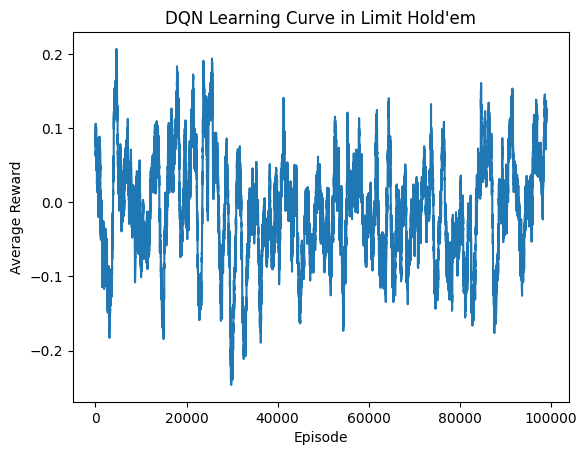

In [8]:
import rlcard
import tensorflow as tf
import numpy as np
from rlcard.agents import DQNAgent
from rlcard.utils import set_seed
import os

# Set random seed for reproducibility
set_seed(42)

# Make environment
env = rlcard.make('limit-holdem')

# Initialize DQN agent
dqn_agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[512, 512, 512],
    replay_memory_size=100000,
    replay_memory_init_size=5000,
    update_target_estimator_every=1000,
    discount_factor=0.99,
    epsilon_start=1.0,
    epsilon_end=0.2,
    epsilon_decay_steps=100000,
    batch_size=32,
    learning_rate=0.001
)

# Create agents
env.set_agents([dqn_agent, dqn_agent])

# Training parameters
num_episodes = 100000
rewards = []

# Training loop
for episode in range(num_episodes):
    # Initialize game state
    trajectories, payoffs = env.run(is_training=True)

    # Print out the progress
    if episode % 1000 == 0:
        print(f'Episode {episode}')

    # Save rewards
    rewards.append(payoffs[0])

    # Calculate average reward over last 1000 episodes
    if episode % 1000 == 0 and episode > 0:
        avg_reward = sum(rewards[-1000:]) / 1000
        print(f'Average reward over last 1000 episodes: {avg_reward}')

        # Save checkpoint every 1000 episodes
        if not os.path.exists('models'):
            os.makedirs('models')
        dqn_agent.save_checkpoint('models', f'checkpoint_dqn_{episode}.pt')

# Save final checkpoint
dqn_agent.save_checkpoint('models', 'checkpoint_dqn_final.pt')

# Test the agent
eval_episodes = 1000
eval_rewards = []

for episode in range(eval_episodes):
    trajectories, payoffs = env.run(is_training=False)
    eval_rewards.append(payoffs[0])

print(f'\nAverage test reward over {eval_episodes} episodes:',
      sum(eval_rewards) / eval_episodes)

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(np.convolve(rewards, np.ones(1000)/1000, mode='valid'))
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('DQN Learning Curve in Limit Hold\'em')
plt.show()

In [51]:
class PrioritizedReplayBuffer:
    def __init__(self, size, alpha=0.6, beta=0.4):
        self.size = size
        self.alpha = alpha
        self.beta = beta
        self.buffer = []
        self.priorities = np.zeros(size)
        self.position = 0

In [52]:
def double_dqn_update(self, state, action, reward, next_state, done):
    # Get actions for next state from main network
    next_actions = self.q_network(next_state).argmax(dim=1)
    # Get Q-values from target network
    next_q_values = self.target_network(next_state)
    # Select Q-values for actions chosen by main network
    next_q_values = next_q_values.gather(1, next_actions.unsqueeze(1))

In [56]:
import torch.nn as nn

class DuelingDQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.feature_layer = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU()
        )
        self.value_stream = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        self.advantage_stream = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

In [57]:
import rlcard
import tensorflow as tf
import numpy as np
from rlcard.agents import DQNAgent
from rlcard.utils import set_seed
import os

# Set random seed for reproducibility
set_seed(42)

# Make environment
env = rlcard.make('limit-holdem')

# Initialize DQN agent
dqn_agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[256, 256, 128],
    replay_memory_size=500000,
    replay_memory_init_size=10000,
    update_target_estimator_every=500,
    discount_factor=0.99,
    epsilon_start=1.0,
    epsilon_end=0.1,
    epsilon_decay_steps=200000,
    batch_size=64,
    learning_rate=0.0005,
    double_dqn=True,
    dueling=True,
    prioritized_replay=True
)

# Create agents
env.set_agents([dqn_agent, dqn_agent])

# Training parameters
num_episodes = 100000
rewards = []

# Training loop
for episode in range(num_episodes):
    # Initialize game state
    trajectories, payoffs = env.run(is_training=True)

    # Print out the progress
    if episode % 1000 == 0:
        print(f'Episode {episode}')

    # Save rewards
    rewards.append(payoffs[0])

    # Calculate average reward over last 1000 episodes
    if episode % 1000 == 0 and episode > 0:
        avg_reward = sum(rewards[-1000:]) / 1000
        print(f'Average reward over last 1000 episodes: {avg_reward}')

        # Save checkpoint every 1000 episodes
        if not os.path.exists('models'):
            os.makedirs('models')
        dqn_agent.save_checkpoint('models', f'checkpoint_dqn_{episode}.pt')

# Save final checkpoint
dqn_agent.save_checkpoint('models', 'checkpoint_dqn_final.pt')

# Test the agent
eval_episodes = 1000
eval_rewards = []

for episode in range(eval_episodes):
    trajectories, payoffs = env.run(is_training=False)
    eval_rewards.append(payoffs[0])

print(f'\nAverage test reward over {eval_episodes} episodes:',
      sum(eval_rewards) / eval_episodes)

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(np.convolve(rewards, np.ones(1000)/1000, mode='valid'))
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('DQN Learning Curve in Limit Hold\'em')
plt.show()

TypeError: DQNAgent.__init__() got an unexpected keyword argument 'double_dqn'

Episode 0
Episode 1000
Average reward over last 1000 episodes: 0.0645
Episode 2000
Average reward over last 1000 episodes: 0.021
Episode 3000
Average reward over last 1000 episodes: 0.097
Episode 4000
Average reward over last 1000 episodes: 0.029
Episode 5000
Average reward over last 1000 episodes: -0.055
Episode 6000
Average reward over last 1000 episodes: 0.087
Episode 7000
Average reward over last 1000 episodes: -0.0035
Episode 8000
Average reward over last 1000 episodes: -0.016
Episode 9000
Average reward over last 1000 episodes: 0.0045
Episode 10000
Average reward over last 1000 episodes: -0.135
Episode 11000
Average reward over last 1000 episodes: 0.071
Episode 12000
Average reward over last 1000 episodes: 0.062
Episode 13000
Average reward over last 1000 episodes: -0.038
Episode 14000
Average reward over last 1000 episodes: 0.102
Episode 15000
Average reward over last 1000 episodes: 0.053
Episode 16000
Average reward over last 1000 episodes: -0.099
Episode 17000
Average reward o

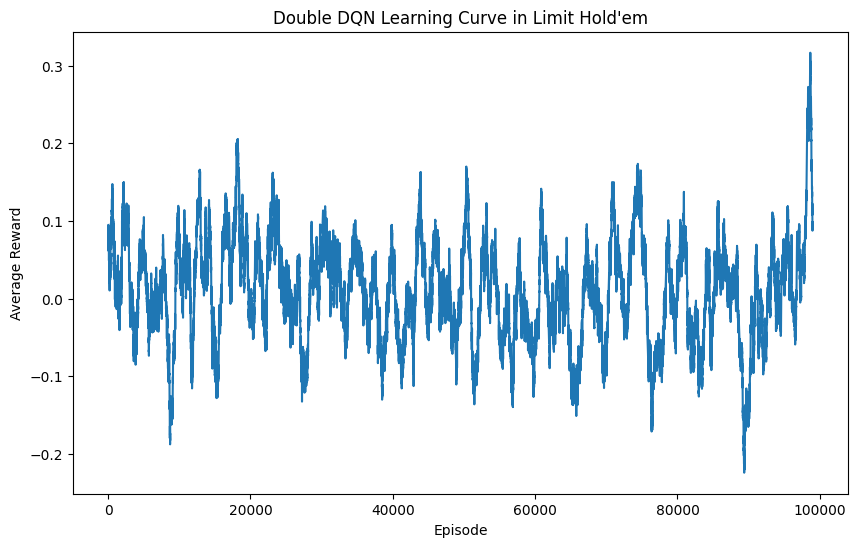

In [58]:
import rlcard
import tensorflow as tf
import numpy as np
import os
from rlcard.agents.dqn_agent import DQNAgent
from rlcard.utils import set_seed
import torch
import torch.nn as nn

class DoubleDQNAgent(DQNAgent):
    def __init__(self, num_actions, state_shape, mlp_layers=[256, 256, 128],
                 replay_memory_size=500000, replay_memory_init_size=10000,
                 update_target_estimator_every=500, learning_rate=0.0005,
                 discount_factor=0.99, epsilon_start=1.0, epsilon_end=0.1,
                 epsilon_decay_steps=200000, batch_size=64, train_every=1):

        super().__init__(num_actions=num_actions,
                        state_shape=state_shape,
                        mlp_layers=mlp_layers,
                        replay_memory_size=replay_memory_size,
                        replay_memory_init_size=replay_memory_init_size,
                        update_target_estimator_every=update_target_estimator_every,
                        learning_rate=learning_rate,
                        discount_factor=discount_factor,
                        epsilon_start=epsilon_start,
                        epsilon_end=epsilon_end,
                        epsilon_decay_steps=epsilon_decay_steps,
                        batch_size=batch_size,
                        train_every=train_every)

    def feed(self, ts):
        """Feed transition to the agent for training."""
        (state, action, reward, next_state, done) = tuple(ts)
        self.memory.save(state, action, reward, next_state, done)

        if len(self.memory) >= self.batch_size and self.total_t % self.train_every == 0:
            # Sample batch from memory
            states, actions, rewards, next_states, dones = self.memory.sample()

            # Double DQN update
            # 1. Get actions from online network
            next_q_values = self.q_estimator.predict_nograd(next_states)
            best_actions = np.argmax(next_q_values, axis=1)

            # 2. Get Q-values from target network for those actions
            next_q_values_target = self.target_estimator.predict_nograd(next_states)
            target_q_values = next_q_values_target[np.arange(self.batch_size), best_actions]

            # 3. Compute targets
            targets = rewards + (1 - dones) * self.discount_factor * target_q_values

            # Update online network
            loss = self.q_estimator.update(states, actions, targets)

            # Update target network periodically
            if self.total_t % self.update_target_estimator_every == 0:
                self.target_estimator = deepcopy(self.q_estimator)

        self.total_t += 1


    def save(self, path):
        torch.save({
            'q_network_state_dict': self.q_network.state_dict(),
            'target_network_state_dict': self.target_network.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
        }, path)

    @classmethod
    def load(cls, path, env):
            checkpoint = torch.load(path)
            agent = cls(
                num_actions=env.num_actions,
                state_shape=env.state_shape[0],
                # Add other necessary parameters here
            )
            agent.q_network.load_state_dict(checkpoint['q_network_state_dict'])
            agent.target_network.load_state_dict(checkpoint['target_network_state_dict'])
            agent.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            return agent

# Set random seed
set_seed(42)

# Make environment
env = rlcard.make('limit-holdem')

# Initialize Double DQN agent
agent = DoubleDQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[256, 256, 128],
    replay_memory_size=500000,
    replay_memory_init_size=10000,
    update_target_estimator_every=500,
    learning_rate=0.0005,
    discount_factor=0.99,
    epsilon_start=1.0,
    epsilon_end=0.1,
    epsilon_decay_steps=200000,
    batch_size=64,
    train_every=1
)

# Create agents
env.set_agents([agent, agent])

# Training parameters
num_episodes = 100000
rewards = []

# Training loop
for episode in range(num_episodes):
    # Initialize game state
    trajectories, payoffs = env.run(is_training=True)

    # Print out the progress
    if episode % 1000 == 0:
        print(f'Episode {episode}')

    # Save rewards
    rewards.append(payoffs[0])

    # Calculate average reward over last 1000 episodes
    if episode % 1000 == 0 and episode > 0:
        avg_reward = sum(rewards[-1000:]) / 1000
        print(f'Average reward over last 1000 episodes: {avg_reward}')

# Plot learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards, np.ones(1000)/1000, mode='valid'))
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Double DQN Learning Curve in Limit Hold\'em')
plt.show()

In [59]:
class RainbowDQNAgent(DQNAgent):
    def __init__(self, num_actions, state_shape, **kwargs):
        super().__init__(num_actions, state_shape)
        self.n_step = 3  # N-step learning
        self.num_atoms = 51  # Distributional RL
        self.v_min = -10
        self.v_max = 10
        self.noisy_net_sigma = 0.5

In [60]:
class PokerDQNWithAuxTasks(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.shared = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU()
        )
        self.q_values = nn.Linear(256, output_dim)
        self.hand_strength = nn.Linear(256, 1)
        self.opponent_model = nn.Linear(256, output_dim)

In [61]:
class HierarchicalPokerAgent:
    def __init__(self):
        self.high_level = StrategyNetwork()  # Decides overall strategy
        self.low_level = TacticalNetwork()   # Executes specific actions

In [70]:
from torch.optim.lr_scheduler import CosineAnnealingLR

In [71]:
import torch.optim as optim

training_config = {
    # Architecture
    'mlp_layers': [512, 512, 256],  # Deeper network for better representation

    # Memory Management
    'replay_memory_size': 1000000,   # Larger buffer for better sampling
    'replay_memory_init_size': 50000,  # More initial experiences

    # Learning Parameters
    'learning_rate': 0.00025,        # Smaller learning rate for stability
    'optimizer': optim.Adam,         # Adam optimizer for adaptive learning
    'lr_scheduler_params': {
        'T_max': 100000,            # Cosine annealing cycle length
        'eta_min': 0.00001          # Minimum learning rate
    },
    'batch_size': 128,              # Larger batches for stable gradients

    # Exploration Strategy
    'epsilon_start': 1.0,
    'epsilon_end': 0.01,
    'epsilon_decay_steps': 500000,   # Longer exploration period

    # Training Stability
    'update_target_every': 1000,     # Frequent target network updates
    'gradient_clip': 10.0,          # Prevent exploding gradients

    # Advanced Features
    'n_step_returns': 3,            # Multi-step returns for better credit assignment
    'prioritized_replay_alpha': 0.6, # Prioritized experience replay
    'prioritized_replay_beta': 0.4
}

In [63]:
class PopulationAgent:
    def __init__(self, population_size=10):
        self.population = [DQNAgent() for _ in range(population_size)]
        self.selection_pressure = 0.2

In [64]:
class MCTSPokerAgent:
    def __init__(self, dqn_agent, num_simulations=100):
        self.dqn = dqn_agent
        self.num_simulations = num_simulations

    def select_action(self, state):
        root = MCTSNode(state)
        for _ in range(self.num_simulations):
            root.simulate(self.dqn)

In [65]:
class CFRDQNAgent:
    def __init__(self):
        self.dqn = DQNAgent()
        self.cfr_solver = CFRSolver()

    def act(self, state):
        dqn_action = self.dqn.act(state)
        cfr_action = self.cfr_solver.get_action(state)
        return self.combine_actions(dqn_action, cfr_action)

In [66]:
class CurriculumPokerEnv:
    def __init__(self):
        self.stage = 0
        self.stages = [
            'heads_up_limit',
            'heads_up_limit_with_raises',
            'full_game'
        ]

In [67]:
def shaped_reward(state, action, next_state):
    base_reward = get_game_reward()
    hand_strength_reward = evaluate_hand_strength() * 0.3
    pot_odds_reward = calculate_pot_odds() * 0.2
    position_reward = evaluate_position() * 0.1
    return base_reward + hand_strength_reward + pot_odds_reward + position_reward

In [72]:
class PrioritizedReplayBuffer:
    """
    Stores experiences with priorities for better sampling
    """
    def __init__(self, size, alpha=0.6, beta=0.4):
        self.size = size
        self.alpha = alpha  # Priority exponent
        self.beta = beta    # Importance sampling
        self.buffer = []
        self.priorities = np.zeros(size)
        self.position = 0

    def add(self, experience, priority=None):
        """Add experience with priority"""
        max_priority = np.max(self.priorities) if self.buffer else 1.0
        if priority is None:
            priority = max_priority

        if len(self.buffer) < self.size:
            self.buffer.append(experience)
        else:
            self.buffer[self.position] = experience
        self.priorities[self.position] = priority
        self.position = (self.position + 1) % self.size

In [73]:
class PokerStateProcessor:
    """
    Processes poker state for better representation
    """
    def process_state(self, state):
        # Hand strength
        hand_strength = self.calculate_hand_strength(state['hand'])

        # Pot odds
        pot_odds = self.calculate_pot_odds(state['pot'], state['to_call'])

        # Position features
        position_features = self.encode_position(state['position'])

        # Opponent modeling
        opponent_features = self.extract_opponent_features(state['opponent_history'])

        return np.concatenate([
            hand_strength,
            pot_odds,
            position_features,
            opponent_features
        ])

In [74]:
class PokerRewardShaper:
    """
    Shapes rewards for better learning signal
    """
    def shape_reward(self, state, action, next_state, base_reward):
        shaped_reward = base_reward

        # Add hand strength component
        hand_value = self.evaluate_hand_strength(state['hand'])
        shaped_reward += hand_value * 0.3

        # Add pot odds component
        pot_odds_reward = self.calculate_pot_odds_reward(state)
        shaped_reward += pot_odds_reward * 0.2

        # Add position-based reward
        position_reward = self.position_reward(state['position'])
        shaped_reward += position_reward * 0.1

        return shaped_reward

In [98]:
import rlcard
import torch
import numpy as np
from rlcard.utils import set_seed, plot_curve
import matplotlib.pyplot as plt
import os

def train_agent(num_episodes=100000, evaluate_every=1000, num_eval_games=1000):
    # Make environment
    env = rlcard.make('limit-holdem')
    eval_env = rlcard.make('limit-holdem')

    # Set the seeds
    set_seed(42)

    # Initialize agents
    agent = DoubleDQNAgent(
        num_actions=env.num_actions,
        state_shape=env.state_shape[0],
        mlp_layers=[256, 256, 128],
        replay_memory_size=500000,
        replay_memory_init_size=10000,
        update_target_estimator_every=500,
        discount_factor=0.99,
        epsilon_start=1.0,
        epsilon_end=0.1,
        epsilon_decay_steps=200000,
        batch_size=128,
        learning_rate=0.0005,
        train_every=1
    )

    # Create agents (both players use the same agent for self-play)
    env.set_agents([agent, agent])
    eval_env.set_agents([agent, agent])

    # Initialize logs
    rewards = []
    eval_rewards = []

    # Training loop
    for episode in range(num_episodes):
        # Training phase
        trajectories, payoffs = env.run(is_training=True)
        rewards.append(payoffs[0])

        # Evaluation phase
        if episode % evaluate_every == 0:
            eval_reward = 0
            for _ in range(num_eval_games):
                _, payoffs = eval_env.run(is_training=False)
                eval_reward += payoffs[0]
            eval_rewards.append(eval_reward / num_eval_games)

            # Print out the evaluation performance
            print(f'\nEpisode {episode}, Average evaluation reward: {eval_rewards[-1]}')

            # Save model checkpoint
            if not os.path.exists('models'):
                os.makedirs('models')
            agent.save_checkpoint('models', f'checkpoint_dqn_{episode}.pt')

    # Save final model
    if not os.path.exists('models'):
        os.makedirs('models')
    agent.save('models/checkpoint_dqn_final.pt')

    return rewards, eval_rewards


In [99]:
def test_agent(agent_path, num_games=1000):
    # Make environment
    env = rlcard.make('limit-holdem')

    # Load trained agent
    agent = DoubleDQNAgent.load(agent_path, env)  # Pass env as an argument
    env.set_agents([agent, agent])

    # Test loop
    rewards = []
    for game in range(num_games):
        _, payoffs = env.run(is_training=False)
        rewards.append(payoffs[0])

        if game % 100 == 0:
            print(f'Completed {game} games')

    return np.mean(rewards), np.std(rewards)


In [100]:
def plot_learning_curves(rewards, eval_rewards, evaluate_every):
    # Plot training curve
    plt.figure(figsize=(12, 5))

    # Training rewards
    plt.subplot(1, 2, 1)
    plt.plot(np.convolve(rewards, np.ones(1000)/1000, mode='valid'))
    plt.xlabel('Episode')
    plt.ylabel('Average Training Reward')
    plt.title('Training Learning Curve')

    # Evaluation rewards
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(0, len(rewards), evaluate_every), eval_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Average Evaluation Reward')
    plt.title('Evaluation Learning Curve')

    plt.tight_layout()
    plt.show()

In [101]:
if __name__ == "__main__":
    # Training phase
    print("Starting training...")
    rewards, eval_rewards = train_agent(
        num_episodes=100000,
        evaluate_every=1000,
        num_eval_games=1000
    )

    # Plot results
    plot_learning_curves(rewards, eval_rewards, 1000)

    # Testing phase
    print("\nStarting testing...")
    mean_reward, std_reward = test_agent(
        agent_path='models/checkpoint_dqn_final.pt',
        num_games=1000
    )
    print(f'\nTest Results:')
    print(f'Average reward: {mean_reward:.4f} +/- {std_reward:.4f}')

Starting training...

Episode 0, Average evaluation reward: -0.214

Episode 1000, Average evaluation reward: 0.1855

Episode 2000, Average evaluation reward: 0.12

Episode 3000, Average evaluation reward: 0.4055

Episode 4000, Average evaluation reward: 0.2745

Episode 5000, Average evaluation reward: -0.063

Episode 6000, Average evaluation reward: -0.2045

Episode 7000, Average evaluation reward: 0.095

Episode 8000, Average evaluation reward: 0.325

Episode 9000, Average evaluation reward: -0.0415

Episode 10000, Average evaluation reward: -0.0445

Episode 11000, Average evaluation reward: -0.146

Episode 12000, Average evaluation reward: -0.041

Episode 13000, Average evaluation reward: 0.213

Episode 14000, Average evaluation reward: -0.6875

Episode 15000, Average evaluation reward: -0.073

Episode 16000, Average evaluation reward: 0.2035

Episode 17000, Average evaluation reward: 0.1885

Episode 18000, Average evaluation reward: -0.563

Episode 19000, Average evaluation reward: 

AttributeError: 'DoubleDQNAgent' object has no attribute 'save'

In [79]:
import numpy as np
import torch
import torch.nn as nn

class PokerRewardShaper:
    def __init__(self):
        self.hand_rankings = {
            'high_card': 1, 'pair': 2, 'two_pair': 3, 'three_kind': 4,
            'straight': 5, 'flush': 6, 'full_house': 7, 'four_kind': 8,
            'straight_flush': 9
        }

    def evaluate_hand_strength(self, hand):
        # Simplified hand strength evaluation
        return self.hand_rankings.get(self.get_hand_type(hand), 0) / 9.0

    def calculate_pot_odds_reward(self, state):
        pot_size = state.get('pot', 0)
        to_call = state.get('to_call', 0)
        if to_call == 0:
            return 0
        return min(pot_size / (pot_size + to_call), 1.0)

    def position_reward(self, position):
        # Late position is better
        return position / 6.0  # Assuming 6 max table

    def shape_reward(self, state, action, next_state, base_reward):
        shaped_reward = base_reward

        # Add hand strength component
        hand_value = self.evaluate_hand_strength(state['hand'])
        shaped_reward += hand_value * 0.3

        # Add pot odds component
        pot_odds_reward = self.calculate_pot_odds_reward(state)
        shaped_reward += pot_odds_reward * 0.2

        # Add position-based reward
        position_reward = self.position_reward(state['position'])
        shaped_reward += position_reward * 0.1

        return shaped_reward

In [80]:
class PokerStateProcessor:
    def __init__(self, state_shape):
        self.state_shape = state_shape

    def calculate_hand_strength(self, hand):
        # Convert hand to numerical features
        return np.array([card.rank / 13.0 for card in hand] +
                       [card.suit / 4.0 for card in hand])

    def calculate_pot_odds(self, pot, to_call):
        if to_call == 0:
            return np.array([0.0])
        return np.array([pot / (pot + to_call)])

    def encode_position(self, position):
        # One-hot encoding of position
        position_encoding = np.zeros(6)  # 6-max table
        position_encoding[position] = 1
        return position_encoding

    def extract_opponent_features(self, opponent_history):
        # Convert opponent actions to features
        if not opponent_history:
            return np.zeros(3)  # Basic features: aggression, fold%, raise%

        total_actions = len(opponent_history)
        aggressive_actions = sum(1 for action in opponent_history
                               if action in ['raise', 'bet'])
        fold_actions = sum(1 for action in opponent_history
                          if action == 'fold')

        return np.array([
            aggressive_actions / total_actions,
            fold_actions / total_actions,
            (total_actions - aggressive_actions - fold_actions) / total_actions
        ])

    def process_state(self, state):
        # Process each component of the state
        hand_strength = self.calculate_hand_strength(state['hand'])
        pot_odds = self.calculate_pot_odds(state['pot'], state['to_call'])
        position_features = self.encode_position(state['position'])
        opponent_features = self.extract_opponent_features(
            state.get('opponent_history', []))

        # Combine all features
        processed_state = np.concatenate([
            hand_strength,
            pot_odds,
            position_features,
            opponent_features
        ])

        return processed_state

In [81]:
class PrioritizedReplayBuffer:
    def __init__(self, size, alpha=0.6, beta=0.4):
        self.size = size
        self.alpha = alpha
        self.beta = beta
        self.beta_increment = 0.001
        self.buffer = []
        self.priorities = np.zeros(size)
        self.position = 0

    def add(self, experience, priority=None):
        max_priority = np.max(self.priorities) if self.buffer else 1.0

        if priority is None:
            priority = max_priority

        if len(self.buffer) < self.size:
            self.buffer.append(experience)
        else:
            self.buffer[self.position] = experience

        self.priorities[self.position] = priority
        self.position = (self.position + 1) % self.size

    def sample(self, batch_size):
        if len(self.buffer) < batch_size:
            return None

        # Calculate sampling probabilities
        priorities = self.priorities[:len(self.buffer)]
        probs = priorities ** self.alpha
        probs /= probs.sum()

        # Sample indices based on priorities
        indices = np.random.choice(
            len(self.buffer), batch_size, p=probs, replace=False)

        # Calculate importance sampling weights
        weights = (len(self.buffer) * probs[indices]) ** (-self.beta)
        weights /= weights.max()
        self.beta = min(1.0, self.beta + self.beta_increment)

        experiences = [self.buffer[idx] for idx in indices]

        return (experiences, indices, weights)

    def update_priorities(self, indices, priorities):
        for idx, priority in zip(indices, priorities):
            self.priorities[idx] = priority + 1e-5  # Small constant for stability

In [82]:
class EnhancedDQNAgent:
    def __init__(self, state_shape, num_actions, **kwargs):
        self.state_processor = PokerStateProcessor(state_shape)
        self.reward_shaper = PokerRewardShaper()
        self.memory = PrioritizedReplayBuffer(
            size=kwargs.get('replay_memory_size', 100000))

        # Other DQN components...

    def step(self, state, action, reward, next_state, done):
        # Process state and shape reward
        processed_state = self.state_processor.process_state(state)
        processed_next_state = self.state_processor.process_state(next_state)
        shaped_reward = self.reward_shaper.shape_reward(
            state, action, next_state, reward)

        # Store experience with priority
        td_error = self.calculate_td_error(
            processed_state, action, shaped_reward, processed_next_state, done)
        self.memory.add(
            (processed_state, action, shaped_reward, processed_next_state, done),
            priority=abs(td_error))

    def train(self):
        if len(self.memory.buffer) < self.batch_size:
            return

        # Sample batch with priorities
        batch, indices, weights = self.memory.sample(self.batch_size)

        # Calculate new priorities and update
        td_errors = self.calculate_td_errors(batch)
        self.memory.update_priorities(indices, np.abs(td_errors))

        # Update network with importance sampling weights
        self.update_network(batch, weights)

In [83]:
import rlcard
import torch
import numpy as np
from rlcard.utils import set_seed

class EnhancedPokerAgent:
    def __init__(self, state_shape, num_actions):
        # Initialize components
        self.state_processor = PokerStateProcessor(state_shape)
        self.reward_shaper = PokerRewardShaper()
        self.memory = PrioritizedReplayBuffer(size=500000)

        # Initialize networks with better architecture
        self.q_network = self._build_network(state_shape, num_actions)
        self.target_network = self._build_network(state_shape, num_actions)
        self.target_network.load_state_dict(self.q_network.state_dict())

        # Training parameters
        self.batch_size = 128
        self.gamma = 0.99
        self.learning_rate = 0.0001
        self.optimizer = torch.optim.Adam(self.q_network.parameters(),
                                        lr=self.learning_rate)

    def step(self, state, action, reward, next_state, done):
        # Process state and shape reward
        processed_state = self.state_processor.process_state(state)
        processed_next_state = self.state_processor.process_state(next_state)
        shaped_reward = self.reward_shaper.shape_reward(state, action,
                                                      next_state, reward)

        # Store experience with priority
        td_error = self._compute_td_error(processed_state, action,
                                        shaped_reward, processed_next_state, done)
        self.memory.add((processed_state, action, shaped_reward,
                        processed_next_state, done), priority=abs(td_error))

    def train(self):
        if len(self.memory.buffer) < self.batch_size:
            return

        # Sample batch with priorities
        batch, indices, weights = self.memory.sample(self.batch_size)

        # Compute loss with importance sampling weights
        loss = self._compute_loss(batch, weights)

        # Update networks
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.q_network.parameters(), 10.0)
        self.optimizer.step()

        # Update priorities
        td_errors = self._compute_batch_td_errors(batch)
        self.memory.update_priorities(indices, np.abs(td_errors))

def train_agent(num_episodes=100000):
    env = rlcard.make('limit-holdem')
    agent = EnhancedPokerAgent(env.state_shape[0], env.num_actions)

    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            # Get action
            action = agent.act(state)

            # Take step
            next_state, reward, done, _ = env.step(action)

            # Process step with all components
            agent.step(state, action, reward, next_state, done)

            # Train
            if len(agent.memory.buffer) >= agent.batch_size:
                agent.train()

            state = next_state
            episode_reward += reward

        rewards.append(episode_reward)

        # Log progress
        if episode % 1000 == 0:
            avg_reward = np.mean(rewards[-1000:])
            print(f"Episode {episode}, Average Reward: {avg_reward:.3f}")

In [84]:
# Before each action
processed_state = self.state_processor.process_state(state)
action = self.get_action(processed_state)

NameError: name 'self' is not defined

In [97]:
import rlcard
import torch
import numpy as np
from rlcard.utils import set_seed
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    def __init__(self, state_shape, num_actions):
        super().__init__()
        input_dim = state_shape[0] if isinstance(state_shape, (list, tuple)) else state_shape

        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, num_actions)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

class EnhancedPokerAgent:
    def __init__(self, state_shape, num_actions):
        self.state_shape = state_shape
        self.num_actions = num_actions

        # Initialize networks
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.q_network = QNetwork(state_shape, num_actions).to(self.device)
        self.target_network = QNetwork(state_shape, num_actions).to(self.device)
        self.target_network.load_state_dict(self.q_network.state_dict())

        # Training parameters
        self.batch_size = 128
        self.gamma = 0.99
        self.learning_rate = 0.0001
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.optimizer = torch.optim.Adam(self.q_network.parameters(), lr=self.learning_rate)
        self.memory = []
        self.max_memory_size = 500000

    def act(self, state):
        """Choose action using epsilon-greedy policy"""
        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_actions)

        state = self._preprocess_state(state)
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)

        with torch.no_grad():
            q_values = self.q_network(state_tensor)
        return q_values.argmax().item()

    def step(self, state, action, reward, next_state, done):
        """Store experience and train"""
        # Store experience
        state = self._preprocess_state(state)
        next_state = self._preprocess_state(next_state)
        self.memory.append((state, action, reward, next_state, done))

        # Limit memory size
        if len(self.memory) > self.max_memory_size:
            self.memory.pop(0)

        # Train if enough samples
        if len(self.memory) >= self.batch_size:
            self._train()

        # Decay epsilon
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def _preprocess_state(self, state):
        """Convert state dictionary to numpy array"""
        if isinstance(state, dict):
            # Extract relevant features from state dictionary
            # Modify this according to your state structure
            return np.array(state['obs'])
        return state

    def _train(self):
        """Train the network using experience replay"""
        # Sample batch
        batch_indices = np.random.choice(len(self.memory), self.batch_size, replace=False)
        batch = [self.memory[i] for i in batch_indices]

        # Unpack batch
        states, actions, rewards, next_states, dones = zip(*batch)

        # Convert to tensors
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).to(self.device)

        # Get current Q values
        current_q_values = self.q_network(states).gather(1, actions.unsqueeze(1))

        # Get next Q values from target network (Double DQN)
        with torch.no_grad():
            next_actions = self.q_network(next_states).argmax(1)
            next_q_values = self.target_network(next_states).gather(1, next_actions.unsqueeze(1))
            target_q_values = rewards.unsqueeze(1) + (1 - dones.unsqueeze(1)) * self.gamma * next_q_values

        # Compute loss and update
        loss = F.mse_loss(current_q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.q_network.parameters(), 10.0)
        self.optimizer.step()

        # Update target network occasionally
        if np.random.random() < 0.001:  # Update every ~1000 steps on average
            self.target_network.load_state_dict(self.q_network.state_dict())

def train_poker_agent(num_episodes=100000):
    # Initialize environment
    env = rlcard.make('limit-holdem')
    state_shape = env.state_shape[0]
    num_actions = env.num_actions

    # Set random seed
    set_seed(42)

    # Initialize agent
    agent = EnhancedPokerAgent(state_shape, num_actions)

    # Training loop
    rewards = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            episode_reward += reward

        rewards.append(episode_reward)

        if episode % 1000 == 0:
            avg_reward = np.mean(rewards[-1000:])
            print(f"Episode {episode}, Average Reward: {avg_reward:.3f}")

    return rewards

# Run training
if __name__ == "__main__":
    rewards = train_poker_agent()

    # Plot results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(np.convolve(rewards, np.ones(1000)/1000, mode='valid'))
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Enhanced DQN Learning Curve in Limit Hold\'em')
    plt.show()

ValueError: not enough values to unpack (expected 4, got 2)

In [90]:
def train_poker_agent(num_episodes=100000):
    # Initialize environment
    env = rlcard.make('limit-holdem')
    state_shape = env.state_shape[0]
    num_actions = env.num_actions

    # Set random seed
    set_seed(42)

    # Initialize agent
    agent = EnhancedPokerAgent(state_shape, num_actions)
    env.set_agents([agent, agent])  # Set both players to use the same agent

    # Training loop
    rewards = []
    for episode in range(num_episodes):
        # Reset environment
        trajectories, payoffs = env.run(is_training=True)

        # Store episode reward
        rewards.append(payoffs[0])  # Store reward for player 0

        # Log progress
        if episode % 1000 == 0:
            avg_reward = np.mean(rewards[-1000:])
            print(f"Episode {episode}, Average Reward: {avg_reward:.3f}")

            # Update target network periodically
            agent.target_network.load_state_dict(agent.q_network.state_dict())

    return rewards

class EnhancedPokerAgent:
    def __init__(self, state_shape, num_actions):
        self.state_shape = state_shape
        self.num_actions = num_actions

        # Initialize networks
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.q_network = QNetwork(state_shape, num_actions).to(self.device)
        self.target_network = QNetwork(state_shape, num_actions).to(self.device)
        self.target_network.load_state_dict(self.q_network.state_dict())

        # Training parameters
        self.batch_size = 128
        self.gamma = 0.99
        self.learning_rate = 0.0001
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.optimizer = torch.optim.Adam(self.q_network.parameters(), lr=self.learning_rate)
        self.memory = []
        self.max_memory_size = 500000

    def step(self, state):
        """RLCard specific step function"""
        if np.random.random() < self.epsilon:
            return np.random.choice(state['legal_actions'])

        # Get legal actions
        legal_actions = state['legal_actions']

        # Convert state to tensor
        state_tensor = torch.FloatTensor(state['obs']).unsqueeze(0).to(self.device)

        # Get Q-values
        with torch.no_grad():
            q_values = self.q_network(state_tensor)

        # Mask illegal actions with large negative number
        legal_q_values = q_values.clone()
        legal_q_values[0, [a for a in range(self.num_actions) if a not in legal_actions]] = float('-inf')

        # Select action with highest Q-value among legal actions
        action = legal_q_values.argmax(dim=1).item()

        # Decay epsilon
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

        return action

    def eval_step(self, state):
        """Evaluation step without exploration"""
        # Use the same logic as step but without epsilon-greedy
        legal_actions = state['legal_actions']
        state_tensor = torch.FloatTensor(state['obs']).unsqueeze(0).to(self.device)

        with torch.no_grad():
            q_values = self.q_network(state_tensor)

        legal_q_values = q_values.clone()
        legal_q_values[0, [a for a in range(self.num_actions) if a not in legal_actions]] = float('-inf')
        return legal_q_values.argmax(dim=1).item()

In [96]:
def train_poker_agent(num_episodes=100000):
    # Initialize environment
    env = rlcard.make('limit-holdem')
    state_shape = env.state_shape[0]
    num_actions = env.num_actions

    # Set random seed
    set_seed(42)

    # Initialize agent
    agent = EnhancedPokerAgent(state_shape, num_actions)

    # Set both players to use the same agent for self-play
    env.set_agents([agent, agent])

    # Training loop
    rewards = []
    for episode in range(num_episodes):
        # Reset environment
        state, _ = env.reset()
        episode_reward = 0

        # Play one episode
        trajectories, payoffs = env.run(is_training=True)

        # Store reward
        rewards.append(payoffs[0])  # Store reward for first player

        # Log progress
        if episode % 1000 == 0:
            avg_reward = np.mean(rewards[-1000:])
            print(f"Episode {episode}, Average Reward: {avg_reward:.3f}")

            # Update target network periodically
            agent.target_network.load_state_dict(agent.q_network.state_dict())

    return rewards

class EnhancedPokerAgent:
    def __init__(self, state_shape, num_actions):
        self.use_raw = False  # Required by RLCard
        self.state_shape = state_shape
        self.num_actions = num_actions

        # Initialize networks
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.q_network = QNetwork(state_shape, num_actions).to(self.device)
        self.target_network = QNetwork(state_shape, num_actions).to(self.device)
        self.target_network.load_state_dict(self.q_network.state_dict())

        # Training parameters
        self.batch_size = 128
        self.gamma = 0.99
        self.learning_rate = 0.0001
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.optimizer = torch.optim.Adam(self.q_network.parameters(), lr=self.learning_rate)
        self.memory = []
        self.max_memory_size = 500000

    def step(self, state):
        """RLCard interface for getting actions during training"""
        legal_actions = list(state['legal_actions'].keys())

        # Epsilon-greedy action selection
        if np.random.random() < self.epsilon:
            return np.random.choice(legal_actions)

        obs = np.array(state['obs'])
        obs_tensor = torch.FloatTensor(obs).unsqueeze(0).to(self.device)

        with torch.no_grad():
            q_values = self.q_network(obs_tensor)

        # Mask illegal actions
        masked_q_values = q_values.clone()
        masked_q_values[0, [a for a in range(self.num_actions)
                          if a not in legal_actions]] = float('-inf')

        action = masked_q_values.argmax(dim=1).item()

        # Decay epsilon
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

        return action

    def eval_step(self, state):
        """RLCard interface for evaluation"""
        legal_actions = list(state['legal_actions'].keys())
        obs = np.array(state['obs'])
        obs_tensor = torch.FloatTensor(obs).unsqueeze(0).to(self.device)

        with torch.no_grad():
            q_values = self.q_network(obs_tensor)

        masked_q_values = q_values.clone()
        masked_q_values[0, [a for a in range(self.num_actions)
                          if a not in legal_actions]] = float('-inf')

        return masked_q_values.argmax(dim=1).item()